1. Диагональные элементы матрицы $R$ (обычно она верхнетреугольная) - собственные значения матрицы $A$.

2. В матрице $U$ находятся собственные векторы матрицы $A$, если матрица $R$ - диагональна. 

3. $$N = \sum_n \sum_{k>n} |R_{nk}|^2 = ||R||^2_F - tr(R^2) = tr(AA^*) - tr(A^2) = tr(A(A^*-A))$$
$$R = U^* A U$$
$$||R||^2_F = tr (RR^*) = tr(U^* A U U^* A^* U) = tr(U^* AA^* U) = tr (U^{-1} AA^* U) = tr(AA^*)$$
$$tr(R^2) = tr(U^* A U U^* A U) = tr(U^* A^2 U) = tr (U^{-1} A^2 U) = tr(A^2)$$
Если $A=A^*$, то матрица будет диагональной, и сумма внедиагональных элементов будет равна 0.
Сумма показывает, на сколько матрица "далека" от эрмитовой.

4. Достаточное условие сходимости: $\frac{\lambda_{k+1}}{\lambda_k}<1$

In [15]:
import numpy as np
from scipy.linalg import norm

In [9]:
A = np.random.randint(10, size=(3,3))

In [10]:
A

array([[4, 0, 7],
       [6, 3, 9],
       [3, 2, 2]])

In [201]:
B = np.array([[1,3,7],[3,1,2],[7,2,1]])

In [202]:
B

array([[1, 3, 7],
       [3, 1, 2],
       [7, 2, 1]])

In [72]:
def power_iteration(A, Niter=10000):
    e0 = np.random.rand(A.shape[1])
    e0 = e0 / np.linalg.norm(e0,2)
    for i in range(Niter):
        ek = A@e0
        e0 = ek / np.linalg.norm(ek,2)
    rad = (e0.T @ (A @ e0)) / (e0.T @ e0)
    return e0, rad

In [196]:
def eigen(Mat, Niter=10000):
    N = Mat.shape[0]
    spec = []
    eig_vec = np.zeros(shape=Mat.shape)
    for k in range(N):
        v, l = power_iteration(Mat)
        spec.append(l)
        for p in range(v.shape[0]):
            eig_vec[p,k] = v[p]
        Mat = Mat - l * np.tensordot(v,v, axes=0) / (v @ v)
    return spec, eig_vec

In [204]:
eigen(B)

([9.479738545337424, -6.08073633257121, -0.3990022127662143],
 array([[ 0.66464807, -0.72239043, -0.19077476],
        [ 0.38602203,  0.11339537,  0.91549357],
        [ 0.63971082,  0.6821243 , -0.35422663]]))

In [205]:
np.linalg.eig(B)

(array([ 9.47973855, -6.08073633, -0.39900221]),
 array([[-0.66464807, -0.72239043,  0.19077476],
        [-0.38602203,  0.11339537, -0.91549357],
        [-0.63971082,  0.6821243 ,  0.35422663]]))

In [206]:
scipy.linalg.schur(B)

(array([[ 9.47973855e+00,  4.55191440e-15, -3.71053513e-16],
        [ 0.00000000e+00, -6.08073633e+00, -1.56810780e-16],
        [ 0.00000000e+00,  0.00000000e+00, -3.99002213e-01]]),
 array([[-0.66464807, -0.72239043,  0.19077476],
        [-0.38602203,  0.11339537, -0.91549357],
        [-0.63971082,  0.6821243 ,  0.35422663]]))

In [292]:
eps = np.finfo(float).eps
A = np.array([[1,1e+07],[0,2]])
np.linalg.eig(A)

(array([1., 2.]),
 array([[1.e+00, 1.e+00],
        [0.e+00, 1.e-07]]))

In [261]:
np.linalg.eig(A.T)

(array([2., 1.]),
 array([[ 0.e+00,  1.e-07],
        [ 1.e+00, -1.e+00]]))

In [298]:
#For eigenvalue l=1
v1 = np.array([1, 0])
v2 = np.array([1.e-07, -1.e+00])
s = v1 @ v2
print('s(l=1) = ', s)

s(l=1) =  1e-07


In [299]:
W = np.random.randn(2,2)
W = W / np.linalg.norm(W)
print('Perturbation:\n',W)

Perturbation:
 [[-0.79834487  0.29849811]
 [ 0.35384342 -0.38514826]]


In [306]:
e = 100*eps
AW = A + e * W
scipy.linalg.schur(AW)

(array([[9.99999921e-01, 1.00000000e+07],
        [0.00000000e+00, 2.00000008e+00]]),
 array([[-1.00000000e+00, -7.85690166e-15],
        [ 7.85690166e-15, -1.00000000e+00]]))

In [309]:
print('Theoretical changes in eigenvalues: ', e / s)
print('Real changes: ', abs(np.linalg.eig(A)[0] - np.linalg.eig(AW)[0])[0])
print('Theoretical changes are bigger than real')

Theoretical changes in eigenvalues:  2.220446049250313e-07
Real changes:  7.856903438963059e-08
Theoretical changes are bigger than real


In [311]:
a = 5
B = np.array([[1,a],[0,1]])
Beps = np.array([[1,a],[eps,1]])

In [316]:
L, V = scipy.linalg.eig(B)
Leps, Veps = scipy.linalg.eig(Beps)
print('Eigenvalues',L)
print('Eigenvectors\n',V,'\n')
print('Difference in eigenvalues\n', abs(L-Leps)[0],'\n')
print('Max difference in eigenvectors\n', np.amax(abs(V-Veps)))

Eigenvalues [1.+0.j 1.+0.j]
Eigenvectors
 [[ 1.0000000e+00 -1.0000000e+00]
 [ 0.0000000e+00  4.4408921e-17]] 

Difference in eigenvalues
 3.332000941824731e-08 

Max difference in eigenvectors
 6.664001874625056e-09


In [317]:
B = np.array([[1,3,7],[3,1,2],[7,2,1]])

In [367]:
B

array([[1, 3, 7],
       [3, 1, 2],
       [7, 2, 1]])

In [395]:
import matplotlib.pyplot as plt
def QR_Schur(Mat, epsilon = 10*eps):
    def Residual(Mat):
        n = Mat.shape[0]
        S = 0
        for i in range(n):
            for k in range(n):
                if i != k:
                    S += Mat[i,k] * Mat[i,k]
        return np.sqrt(S)
    
    Mat = scipy.linalg.hessenberg(Mat)
    N = Residual(Mat)
    U, V = scipy.linalg.schur(Mat)
    count = 0
    dist = []
    QQ = np.eye(Mat.shape[0])
    while N > epsilon:
        mu = Mat[-1,-1]
        Mat = Mat - mu * np.eye(Mat.shape[0])
        Q, R = np.linalg.qr(Mat)
        Mat = R @ Q + mu * np.eye(Mat.shape[0])
#         Q, R = np.linalg.qr(Mat)
#         Mat = R @ Q
        N = Residual(Mat)
        count += 1
        dist.append(np.amax(Mat-U))
        QQ = QQ @ Q
    
    niter = [i for i in range(1,count+1)]
    plt.plot(niter, dist)
    plt.xlabel('N')
    plt.ylabel('Distance')
    plt.yscale('log')
    
    return Mat, QQ

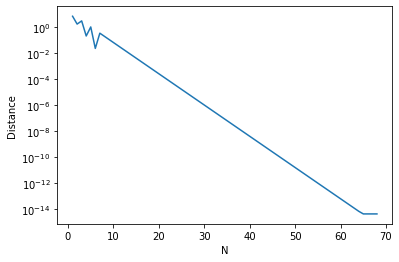

In [397]:
R, Q = QR_Schur(B)

In [392]:
Y, P = scipy.linalg.schur(B)

[[-0.66464807 -0.72239043  0.19077476]
 [-0.38602203  0.11339537 -0.91549357]
 [-0.63971082  0.6821243   0.35422663]]


In [406]:
print('Difference in R:\n', Y-R,'\n')
print('Difference in Q:\n', P-Q)

Difference in R:
 [[ 1.77635684e-15  5.57834898e-15 -3.08860263e-18]
 [-7.71350923e-16 -4.44089210e-15  2.07467229e-16]
 [ 0.00000000e+00  0.00000000e+00  5.55111512e-17]] 

Difference in Q:
 [[-1.32929614e+00  4.44089210e-16  5.55111512e-17]
 [ 3.54026525e-01  7.85035148e-01 -9.50538515e-01]
 [-5.36895037e-01  5.17649161e-01 -6.26781445e-01]]


In [424]:
def SVD_decomposition(Mat, epsilon = 10*eps):
    def Residual(Mat):
        n = Mat.shape[0]
        S = 0
        for i in range(n):
            for k in range(n):
                if i != k:
                    S += Mat[i,k] * Mat[i,k]
        return np.sqrt(S)
    
    def LQ_decomposition(Mat):
        Q,R = np.linalg.qr(Mat)
        L = R.T.conjugate()
        Q = Q.T.conjugate()
        return L, Q
    
    Mat = scipy.linalg.hessenberg(Mat)
    N = Residual(Mat)
    UU = np.eye(Mat.shape[0])
    VV = np.eye(Mat.shape[1])
    while N > epsilon:
        Q, R = np.linalg.qr(Mat)
        L, P = LQ_decomposition(R)
        Mat = L
        N = Residual(Mat)
        UU = UU @ Q
        VV = VV @ P
        
    return UU, np.diag(Mat), VV

In [425]:
SVD_decomposition(B)

(array([[-0.06033801,  0.99144793,  0.11571655],
        [-0.97629466, -0.08275867,  0.19999937],
        [ 0.20786551, -0.10090589,  0.97293881]]),
 array([ 9.47973855, -6.08073633, -0.39900221]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [417]:
np.linalg.svd(B)

(array([[-0.66464807,  0.72239043,  0.19077476],
        [-0.38602203, -0.11339537, -0.91549357],
        [-0.63971082, -0.6821243 ,  0.35422663]]),
 array([9.47973855, 6.08073633, 0.39900221]),
 array([[-0.66464807, -0.38602203, -0.63971082],
        [-0.72239043,  0.11339537,  0.6821243 ],
        [-0.19077476,  0.91549357, -0.35422663]]))